# Year on Year Comparison and Month on Month Comparison

In [38]:
# Imported Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
%matplotlib inline

In [39]:
# Dataset Display Settings
pd.set_option('display.max_columns', None)

In [40]:
%%HTML
<style type=""text/CSS"">
table.dataframe td, table.dataframe th {
    border: 1px green solid !important;
    color: purple !important;
}

In [41]:
os.listdir('/Users/peace/github')

['.ipynb_checkpoints',
 'Comparison.ipynb',
 'README.md',
 'Y&M_data.csv',
 'YoY&play']

In [42]:
# load the dataset
df = pd.read_csv("/Users/peace/github/Y&M_data.csv")
df.head()

,Date,averagePrice,volume1,volume2,large_bags,small bags,type,year,region
0,12/13/2018,1.41,2041.45,6847.69,5576.77,93.81,conventional,2018,Peterborough
1,12/20/2018,1.32,1456.58,3843.58,4467.19,75.84,conventional,2018,Peterborough
2,10/20/2018,0.89,860.09,9578.95,6435.67,48.16,conventional,2018,Peterborough
3,10/20/2018,1.38,585.45,6478.65,3455.23,69.34,conventional,2018,Peterborough
4,11/11/2018,1.22,734.23,9574.48,8687.02,83.27,conventional,2018,Ipswich


In [43]:
#df['type'].value_counts()

In [44]:
# Convert each column to lower case
# df.columns.str.lower()
# df.head(1)

In [45]:
# Rename the first columns "Date" to "date"
df.rename(columns = {
    'Date': 'date'
    }, inplace =True)

df.head(1)

,date,averagePrice,volume1,volume2,large_bags,small bags,type,year,region
0,12/13/2018,1.41,2041.45,6847.69,5576.77,93.81,conventional,2018,Peterborough


In [46]:
# The basic description of each column of the dataframe 
df.describe()

,averagePrice,volume1,volume2,large_bags,small bags,year
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,1.306145,1575.025196,50692.468436,6296.325810,65.545587,2019.960894
std,0.305116,1988.242391,37790.344995,2209.663627,32.832269,1.427511
min,0.690000,563.120000,3843.580000,334.010000,10.100000,2018.000000
25%,1.110000,852.535000,8749.430000,4536.985000,48.160000,2019.000000
50%,1.290000,968.980000,56471.430000,6478.150000,67.290000,2020.000000
75%,1.510000,1012.290000,75788.770000,8589.170000,83.270000,2021.000000
max,1.910000,8759.870000,172829.320000,9778.990000,130.340000,2022.000000


In [47]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          179 non-null    object 
 1   averagePrice  179 non-null    float64
 2   volume1       179 non-null    float64
 3   volume2       179 non-null    float64
 4   large_bags    179 non-null    float64
 5   small bags    179 non-null    float64
 6   type          179 non-null    object 
 7   year          179 non-null    int64  
 8   region        179 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 12.7+ KB


In [48]:
# show the minimum and maximum date in the dataframe
df['date'].min(), df['date'].max()

('01/05/2018', '9/23/2022')

In [49]:
# If over ranged date is few, THE BEST way to Correcting an over ranged date is the below code 
# ("11/22/20119" with "11/22/2019" through replacement method).
# df.loc[df['date']=='11/22/20119','date']='11/22/2019'

# Now change date type to datetime
# df['date']=pd.to_datetime(df['date'])

In [50]:
#To play safe and smart, change date type to datetime and convert any out of ranged date to null.
df['date']=pd.to_datetime(df['date'], errors="coerce")
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
# show the data type
df.dtypes

date            datetime64[ns]
averagePrice           float64
volume1                float64
volume2                float64
large_bags             float64
small bags             float64
type                    object
year                     int64
region                  object
dtype: object

In [52]:
# Check for null value
df.isnull().sum().sort_values(ascending = False)

date            2
averagePrice    0
volume1         0
volume2         0
large_bags      0
small bags      0
type            0
year            0
region          0
dtype: int64

In [53]:
# Fill the missing value
df.loc[df['date'].isnull(), 'date'] = df['date'].median()

# Checking for Null value the column "date"
df.date.isnull().sum()

0

In [54]:
# Check for duplicate in the dataset
#df.drop_duplicates(keep='first', inplace=True)

# Check duplicate in 2 columns and drop the duplicates.
df.duplicated(subset=['date', 'region'])
df.drop_duplicates(subset =['date', 'region'], inplace=True)

#### Graphical representation of the valued data

Text(0.5, 1.0, 'Average price of organic and conventional orange')

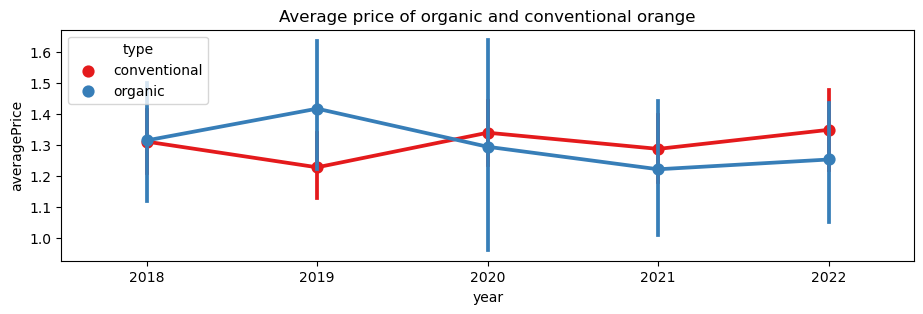

In [55]:
# Show the average price for the type column in each year
plt.figure(figsize=(11,3))
sns.pointplot(data=df, x='year', y='averagePrice', hue='type', palette='Set1')
plt.title('Average price of organic and conventional orange')

Text(0.5, 1.0, 'The yearly average price distribution for each town')

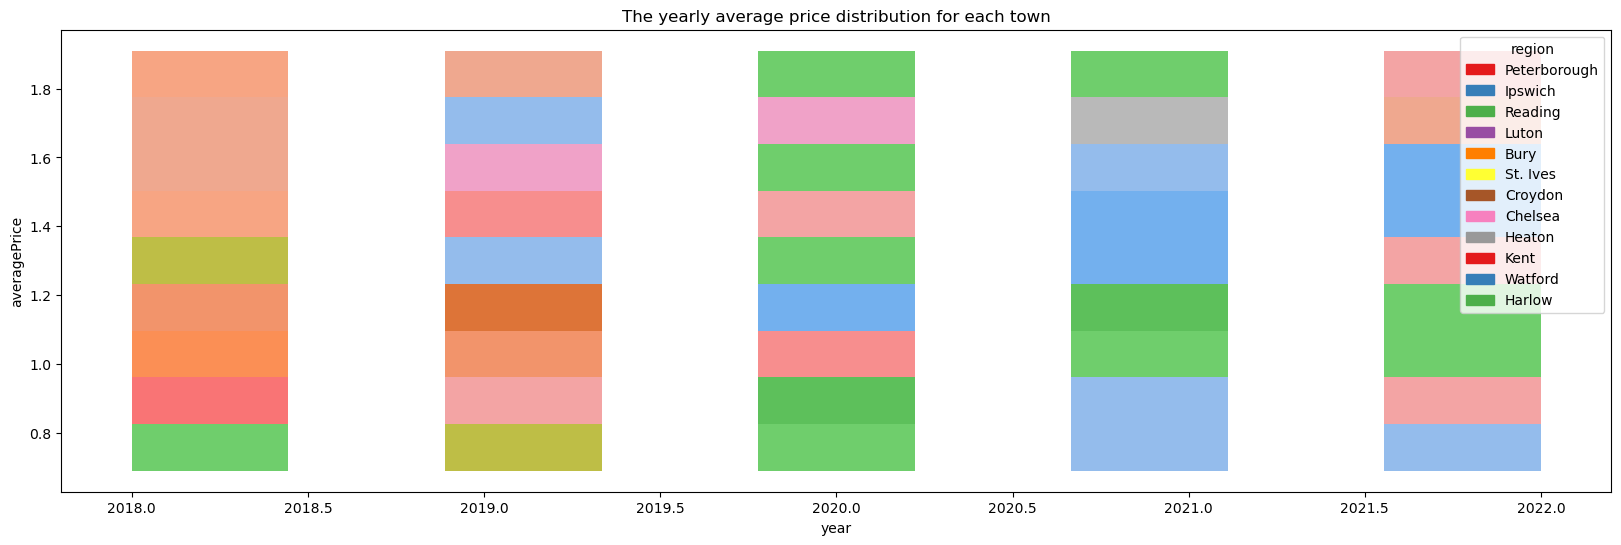

In [84]:
# Display the yearly average price distribution of each town 
plt.figure(figsize=(20,6))
sns.histplot(data=df, x='year', y='averagePrice', hue='region', element='dodge', palette='Set1', bins='auto')
plt.title('The yearly average price distribution for each town')

In [130]:
# Creating a new dataFrame from the dataset: region, date and average price
F1 = df[['date', 'region', 'averagePrice']]
F1.head()

,date,region,averagePrice
0,2018-12-13,Peterborough,1.41
1,2018-12-20,Peterborough,1.32
2,2018-10-20,Peterborough,0.89
4,2018-11-11,Ipswich,1.22
5,2018-11-17,Ipswich,1.09


In [176]:
# Comparison of each column to the previous column
# Create a new column "average price difference" in F1 dataframe and isolate averagePrice column to show the difference 
F1.loc['avgPrice_difference'] = F1['averagePrice'].diff(1)
F1.head()

,date,region,averagePrice
0,2018-12-13,Peterborough,1.41
1,2018-12-20,Peterborough,1.32
2,2018-10-20,Peterborough,0.89
4,2018-11-11,Ipswich,1.22
5,2018-11-17,Ipswich,1.09


### Year to Year Comparison
The average price for each year shall be compared through percentage difference and the average difference.

In [137]:
# Create a year dataframe
year_df = F1.copy()

In [138]:
# Create a new column in the year dataframe "year_df" and feel the column with the year
year_df['year'] = year_df['date'].dt.year
year_df.head(2)

,date,region,averagePrice,year
0,2018-12-13,Peterborough,1.41,2018.0
1,2018-12-20,Peterborough,1.32,2018.0


In [139]:
# Now group each year and reset the index for a better presentation
year_df = year_df.groupby('year')['averagePrice'].mean().reset_index()
year_df

,year,averagePrice
0,2018.0,1.312778
1,2019.0,1.258824
2,2020.0,1.348857
3,2021.0,1.273143
4,2022.0,1.334688


In [140]:
# Create a new column in the year_df dataframe and show the average price difference for the grouped years
year_df['YoY_average_Price_diff'] = year_df['averagePrice'].diff()
year_df

,year,averagePrice,YoY_average_Price_diff
0,2018.0,1.312778,NaN
1,2019.0,1.258824,-0.053954
2,2020.0,1.348857,0.090034
3,2021.0,1.273143,-0.075714
4,2022.0,1.334688,0.061545


##### Average Price Difference of the years
The average_price_diff column indicates the average price difference between the years. To know the average price difference of 2018, the year 2017 average price must be known. However, 2019 average price difference indicates that the average price dropped by -0.054 when compared to the year 2018. 

##### YoY Percentage Difference
The column YoY_%_diff shows the percentage difference between the years. In the year 2021 the price changed by -4.88% while in the year 2022, the price increase by 7.17%.

In [141]:
# Create a new column in the year_df dataframe and show the average price of the YoY 
# percentage difference

year_df['YoY_%_diff'] = round(year_df['YoY_average_Price_diff']/
                              year_df['averagePrice']*100,2).astype(str) + '%'
year_df.head()

,year,averagePrice,YoY_average_Price_diff,YoY_%_diff
0,2018.0,1.312778,NaN,nan%
1,2019.0,1.258824,-0.053954,-4.29%
2,2020.0,1.348857,0.090034,6.67%
3,2021.0,1.273143,-0.075714,-5.95%
4,2022.0,1.334688,0.061545,4.61%


Text(0.5, 1.0, 'Average price difference of the years')

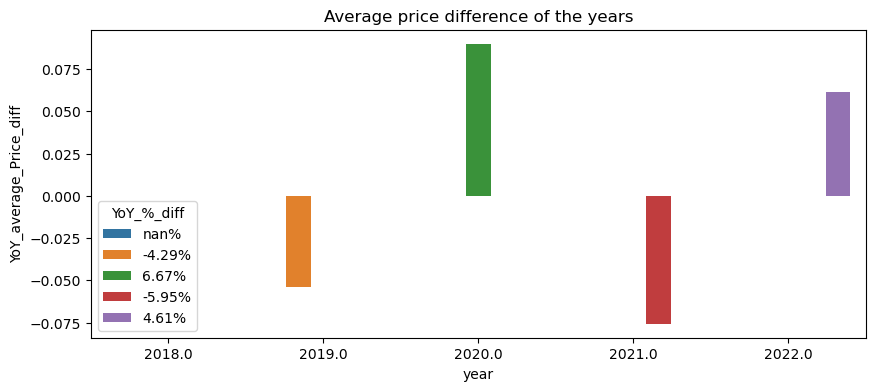

In [143]:
# Bar plot: average price difference of the years
plt.figure(figsize=(10,4))
sns.barplot(data=year_df, x='year', y='YoY_average_Price_diff', hue='YoY_%_diff')
plt.title('Average price difference of the years')

Text(0.5, 1.0, 'The average price difference of the year')

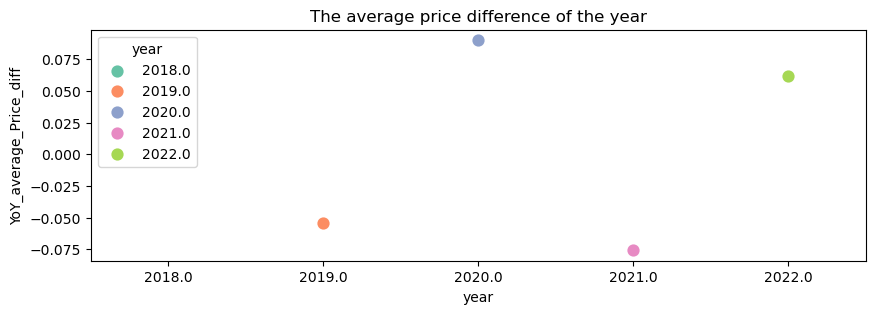

In [152]:
# The average price difference of the year'
plt.figure(figsize=(10,3))
sns.pointplot(data=year_df, x='year', y='YoY_average_Price_diff', hue='year', palette='Set2')
plt.title('The average price difference of the year')

### Month to Month comparison
The average price for each month in the dataframe shall be compared in percentage difference and the average difference of each month.

In [158]:
# Create a new dataframe
month_df = F1.copy()
month_df.head(1)

,date,region,averagePrice
0,2018-12-13,Peterborough,1.41


In [159]:
# create a column and fill the column with years
month_df['year'] = month_df['date'].dt.year
month_df.head(1)

,date,region,averagePrice,year
0,2018-12-13,Peterborough,1.41,2018.0


In [160]:
# create a column and fill the column with months
month_df['month'] = month_df['date'].dt.month
month_df.head(1)

,date,region,averagePrice,year,month
0,2018-12-13,Peterborough,1.41,2018.0,12.0


In [161]:
# Group and reset the index for a better presentation
month_df = month_df.groupby(['year', 'month'])['averagePrice'].mean().reset_index()
month_df.head()

,year,month,averagePrice
0,2018.0,1.0,1.432000
1,2018.0,2.0,1.206667
2,2018.0,3.0,1.610000
3,2018.0,4.0,1.214000
4,2018.0,5.0,1.298000


In [162]:
# Create a new column in the month_df dataframe and show the average price difference for the group 
# of month
month_df['MoM_avgPrice_diff'] = month_df['averagePrice'].diff()
month_df.head()

,year,month,averagePrice,MoM_avgPrice_diff
0,2018.0,1.0,1.432000,NaN
1,2018.0,2.0,1.206667,-0.225333
2,2018.0,3.0,1.610000,0.403333
3,2018.0,4.0,1.214000,-0.396000
4,2018.0,5.0,1.298000,0.084000


#### Average Price Difference of the month
The column MoM_avgPrice_diff shows the average price difference between the months. In the month of February (2), the average price was -0,2253, while in the the month March (3), the average price changed to 0.4033.

In [163]:
# Create a new column in the month_df dataframe and show the average price of the MoM 
# percentage difference

month_df['MoM_%_diff'] = round(month_df['MoM_avgPrice_diff']/month_df['averagePrice']*100,2).astype(str) + '%'
month_df.head()

,year,month,averagePrice,MoM_avgPrice_diff,MoM_%_diff
0,2018.0,1.0,1.432000,NaN,nan%
1,2018.0,2.0,1.206667,-0.225333,-18.67%
2,2018.0,3.0,1.610000,0.403333,25.05%
3,2018.0,4.0,1.214000,-0.396000,-32.62%
4,2018.0,5.0,1.298000,0.084000,6.47%


#### MoM Percentage Difference
The column MoM_%_diff shows the percentage difference between the months. In the month of February (2), the average price -18.67% while in the the month March, the average price changed to 25.05%.

Text(0.5, 1.0, 'Average price difference of the months')

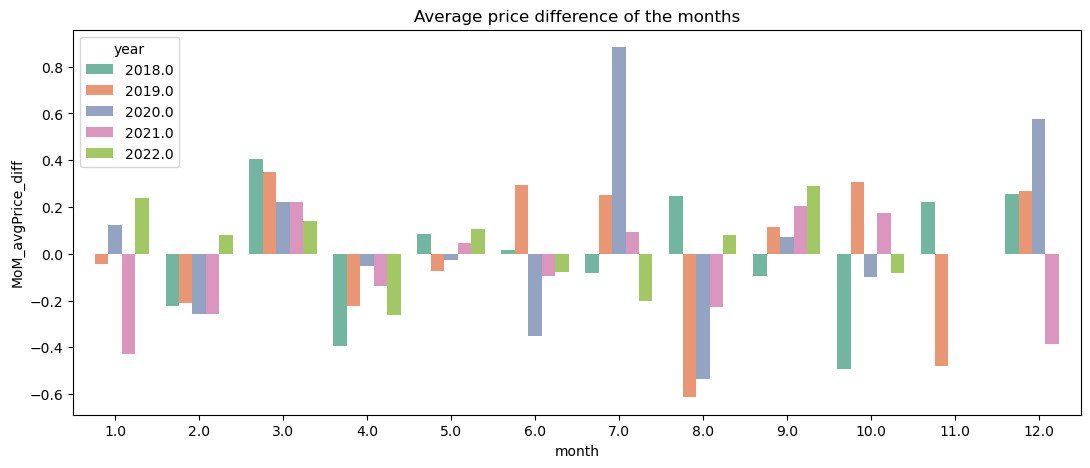

In [164]:
# show the changes in each month of the year with Bar chart
plt.figure(figsize=(13,5))
sns.barplot(data=month_df, x='month', y='MoM_avgPrice_diff', hue='year', palette='Set2')
plt.title('Average price difference of the months')

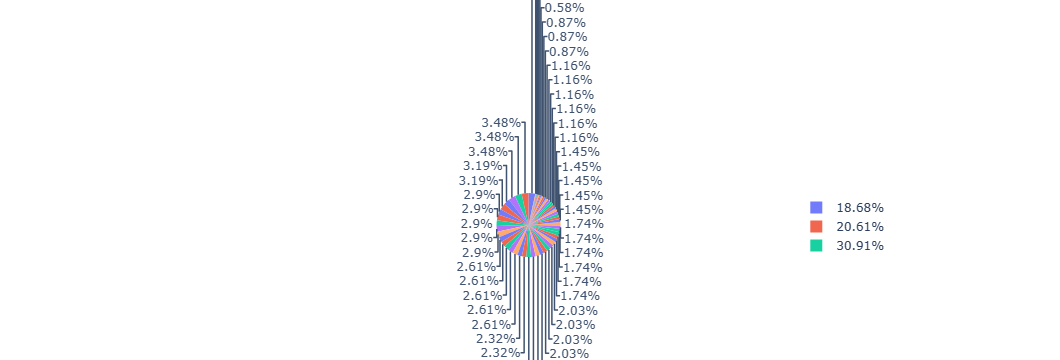

In [169]:
# Plot a pie chart to show the average monthly difference price of each year

#fig5 = px.pie(month_df, values='month', names='MoM_%_diff', color='year', opacity=0.9)
#fig5.show()

Text(0.5, 1.0, 'Total Volume')

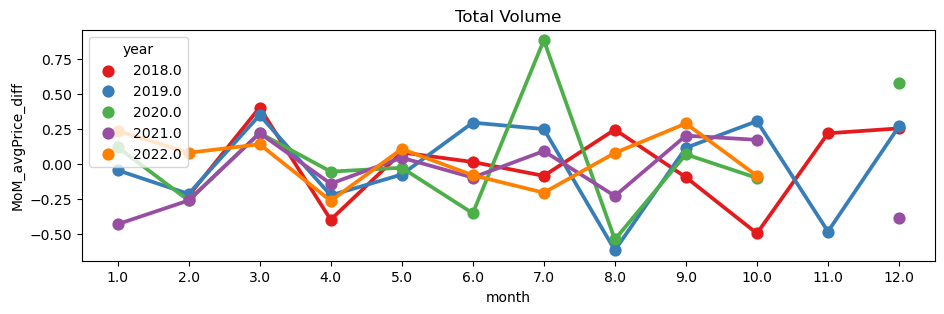

In [166]:
# Show the point plot for each month of the year
plt.figure(figsize=(11,3))
sns.pointplot(data=month_df, x='month', y='MoM_avgPrice_diff', hue='year', palette='Set1')
plt.title('Total Volume')